In [1]:
import stats as st
import compare_vcf as comp
from read_vcf import parse_vcf
import re

try: 
    data = [parse_vcf(f'data-p90/P90-{i}.trimed1000.sv_sniffles.fixed.vcf') for i in range(1, 11)]

# Generate fixed files if needed (fix coverage = None sniffle error)
except FileNotFoundError:
    pattern = r'(COVERAGE=[^;]*)(None)([^;]*;)'
    replacement = r'\g<1>0\g<3>'

    for i in range(1, 11):
        with open(f'data-p90/P90-{i}.trimed1000.sv_sniffles.vcf', 'r') as infile:
            file_contents = infile.read()

        modified_contents = re.sub(pattern, replacement, file_contents)

        with open(f'data-p90/P90-{i}.trimed1000.sv_sniffles.fixed.vcf', 'w') as outfile:
            outfile.write(modified_contents)
    
    data = [parse_vcf(f'data-p90/P90-{i}.trimed1000.sv_sniffles.fixed.vcf') for i in range(1, 11)]


### Plot similarity heatmap between samples

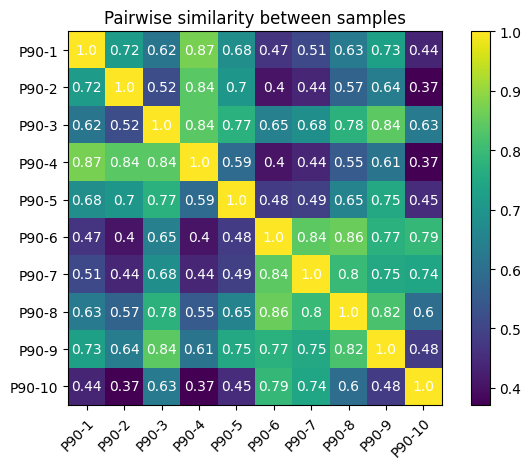

In [10]:
grouped_data = comp.group_variants(data, max_dist=0, min_sim=0.5)
sims = comp.pairwise_similarity(list(range(0, 10)), grouped_data)
comp.variant_heatmap(sims, [f"P90-{i}" for i in range(1, 11)])